# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1800)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1800)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

724

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# set up base url
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#units = "imperial"

# set counters for data looping
record = 0
sets = 1

# create empty lists to hold data
city_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

# gather weather data for cities
for index, city in enumerate(cities):
    
    # set query url to generate json response for cities
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        
        # new set when record hits 50
        if record == 50:
            record = 0
            sets = sets + 1
        
        # append record counter
        else:
            record = record + 1
        
        # print out data
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except:
        print("City not found. Skipping to next available city.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | evensk
City not found. Skipping to next available city.
Processing Record 5 of Set 1 | paamiut
Processing Record 6 of Set 1 | swan hill
Processing Record 7 of Set 1 | bambanglipuro
City not found. Skipping to next available city.
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | vestmannaeyjar
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | nijar
Processing Record 13 of Set 1 | gravdal
Processing Record 14 of Set 1 | mehamn
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | teguise
Processing Record 18 of Set 1 | codrington
City not found. Skipping to next available city.
Processing Record 19 of Set 1 | atocha
Processing Record 20 of S

Processing Record 27 of Set 4 | bambous virieux
Processing Record 28 of Set 4 | iqaluit
Processing Record 29 of Set 4 | tilichiki
Processing Record 30 of Set 4 | surgut
City not found. Skipping to next available city.
Processing Record 31 of Set 4 | santa rosa
Processing Record 32 of Set 4 | deputatskiy
Processing Record 33 of Set 4 | chibombo
Processing Record 34 of Set 4 | thompson
Processing Record 35 of Set 4 | nome
Processing Record 36 of Set 4 | san luis
Processing Record 37 of Set 4 | litovko
City not found. Skipping to next available city.
Processing Record 38 of Set 4 | anadyr
Processing Record 39 of Set 4 | bilibino
Processing Record 40 of Set 4 | turukhansk
Processing Record 41 of Set 4 | shimoda
Processing Record 42 of Set 4 | sri aman
Processing Record 43 of Set 4 | korcula
City not found. Skipping to next available city.
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | belmonte
Processing Record 46 of Set 4 | salina cruz
City not found. Skipping to

Processing Record 2 of Set 8 | shingu
Processing Record 3 of Set 8 | sao joao da barra
Processing Record 4 of Set 8 | pasighat
Processing Record 5 of Set 8 | pitimbu
Processing Record 6 of Set 8 | hobyo
Processing Record 7 of Set 8 | rancho palos verdes
Processing Record 8 of Set 8 | moyale
Processing Record 9 of Set 8 | hualmay
Processing Record 10 of Set 8 | zabaykalsk
Processing Record 11 of Set 8 | luba
Processing Record 12 of Set 8 | ulladulla
Processing Record 13 of Set 8 | saskylakh
Processing Record 14 of Set 8 | abu samrah
Processing Record 15 of Set 8 | maraba
City not found. Skipping to next available city.
Processing Record 16 of Set 8 | rongcheng
Processing Record 17 of Set 8 | viedma
City not found. Skipping to next available city.
Processing Record 18 of Set 8 | el alto
Processing Record 19 of Set 8 | yerbogachen
Processing Record 20 of Set 8 | atambua
Processing Record 21 of Set 8 | mukhen
Processing Record 22 of Set 8 | muroto
Processing Record 23 of Set 8 | vikhorevka

Processing Record 25 of Set 11 | nhulunbuy
Processing Record 26 of Set 11 | peniche
Processing Record 27 of Set 11 | ogaminana
Processing Record 28 of Set 11 | pauini
Processing Record 29 of Set 11 | husavik
Processing Record 30 of Set 11 | vila velha
Processing Record 31 of Set 11 | sarh
Processing Record 32 of Set 11 | ust-maya
Processing Record 33 of Set 11 | coffs harbour
Processing Record 34 of Set 11 | aranos
City not found. Skipping to next available city.
Processing Record 35 of Set 11 | gorontalo
City not found. Skipping to next available city.
Processing Record 36 of Set 11 | oskemen
Processing Record 37 of Set 11 | kulhudhuffushi
Processing Record 38 of Set 11 | oliveira dos brejinhos
Processing Record 39 of Set 11 | sinnamary
Processing Record 40 of Set 11 | culfa
City not found. Skipping to next available city.
Processing Record 41 of Set 11 | tottori
Processing Record 42 of Set 11 | najran
Processing Record 43 of Set 11 | panaba
Processing Record 44 of Set 11 | kodinsk
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# convert to dataframe and set column names
df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": maxtemp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list
})

# send to csv file in output_data directory
df.to_csv("output_data/city_weather.csv", index=False)

# show header rows
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.87,121.90,55.40,87,90,3.36,AU,1609705288
1,Nikolskoye,59.70,30.79,28.40,86,75,2.24,RU,1609705505
2,Ushuaia,-54.80,-68.30,51.80,50,75,12.75,AR,1609705328
3,Evensk,61.95,159.23,1.31,87,100,13.22,RU,1609705506
4,Paamiut,61.99,-49.67,26.35,91,100,13.24,GL,1609705410


In [37]:
# get statistical description of the data
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,6.590000e+02
mean,21.819742,19.782671,48.577041,74.758725,55.825493,8.132944,1.609706e+09
std,33.227442,89.066533,33.915721,18.909665,39.643681,5.876176,8.375055e+01
min,-54.800000,-179.170000,-47.180000,16.000000,0.000000,0.110000,1.609705e+09
25%,-5.155000,-59.130000,30.200000,65.000000,16.000000,4.000000,1.609706e+09
50%,27.910000,23.780000,59.000000,80.000000,74.000000,6.930000,1.609706e+09
75%,50.080000,98.415000,76.730000,88.000000,97.000000,11.410000,1.609706e+09
max,78.220000,179.320000,101.770000,100.000000,100.000000,38.030000,1.609706e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

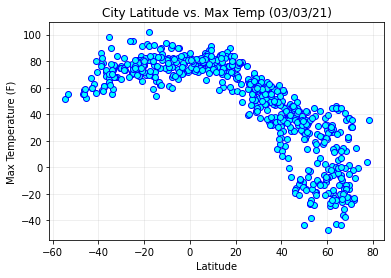

In [46]:
# create scatter plot for lat vs. max temp
plt.scatter(df["Lat"], df["Max Temp"], facecolor="aqua", edgecolor="b")

# title, axes, and gridlines
plt.title("City Latitude vs. Max Temp (03/03/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.25)

# save png
plt.savefig("output_data/lat_vs_temp_plot.png")

This plot suggests that temperatures gradually drop the farther people move from the equator. Cities above the equator (from 0 to 90 degress latitude) have smaller max temps compared to cities below the equator the closer they get to the North Pole. 

## Latitude vs. Humidity Plot

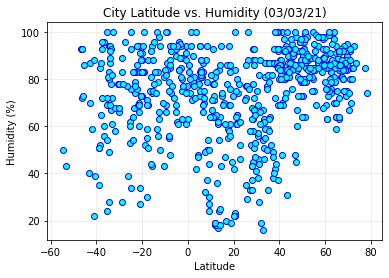

In [47]:
# create scatter plot for lat vs. max temp
plt.scatter(df["Lat"], df["Humidity"], facecolor="aqua", edgecolor="b")

# title, axes, and gridlines
plt.title("City Latitude vs. Humidity (03/03/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.25)

# save png
plt.savefig("output_data/lat_vs_humidity_plot.png")

This plot does not clearly suggest any significant relationship between a city's latitude and humidity.

## Latitude vs. Cloudiness Plot

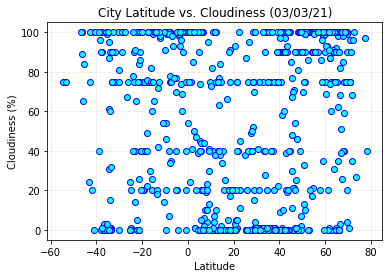

In [50]:
# create scatter plot for lat vs. max temp
plt.scatter(df["Lat"], df["Cloudiness"], facecolor="aqua", edgecolor="b")

# title, axes, and gridlines
plt.title("City Latitude vs. Cloudiness (03/03/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

# save png
plt.savefig("output_data/lat_vs_cloudiness_plot.png")

This plot does not clearly suggest any significant relationship between a city's latitude and cloudiness.

## Latitude vs. Wind Speed Plot

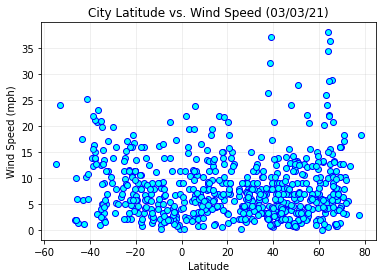

In [52]:
# create scatter plot for lat vs. max temp
plt.scatter(df["Lat"], df["Wind Speed"], facecolor="aqua", edgecolor="b")

# title, axes, and gridlines
plt.title("City Latitude vs. Wind Speed (03/03/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.25)

# save png
plt.savefig("output_data/lat_vs_wind_plot.png")

This plot does not clearly suggest any significant relationship between a city's latitude and wind speed.

## Linear Regression

In [55]:
n_hem = df.loc[df["Lat"] >= 0, :]
s_hem = df.loc[df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7130402669889003
As cities in the northern hemisphere move closer to the north pole and farther from the equator, temperatures drop.
This proves a strong negative correlation between latitude and tempuratures in the northern hemisphere.


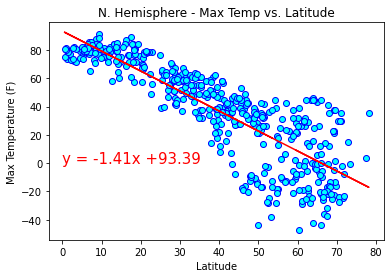

In [74]:
x_vals = n_hem["Lat"]
y_vals = n_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("As cities in the northern hemisphere move closer to the north pole and farther from the equator, temperatures drop.")
print("This proves a strong negative correlation between latitude and tempuratures in the northern hemisphere.")
plt.savefig("output_data/nhem_temp_v_lat_plot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2136235181960462
As some cities in the southern hemisphere move closer to the equator, temperatures rise.
This proves a slight positive correlation between latitude and temperature in the southern hemisphere.


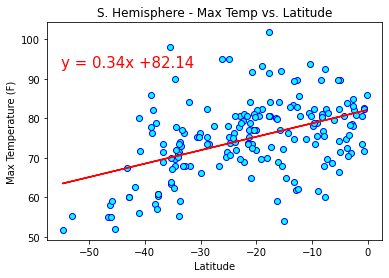

In [75]:
x_vals = s_hem["Lat"]
y_vals = s_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("As some cities in the southern hemisphere move closer to the equator, temperatures rise.")
print("This proves a slight positive correlation between latitude and temperature in the southern hemisphere.")
plt.savefig("output_data/shem_temp_v_lat_plot.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1748430023140373
There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.


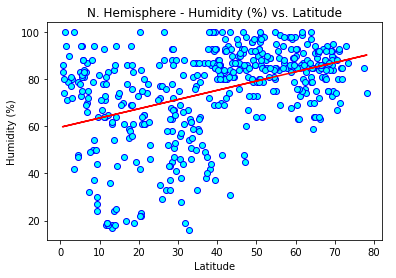

In [78]:
x_vals = n_hem["Lat"]
y_vals = n_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.")

plt.savefig("output_data/nhem_humidity_v_lat_plot.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.038817333237375455
There is a little correlation between humidity and latitude for cities in the southern hemisphere.


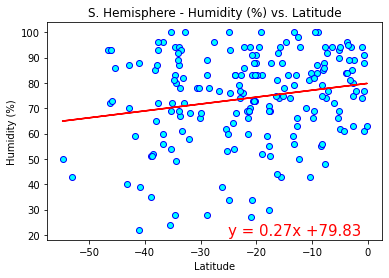

In [81]:
x_vals = s_hem["Lat"]
y_vals = s_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between humidity and latitude for cities in the southern hemisphere.")
plt.savefig("output_data/shem_humidity_v_lat_plot.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12600037688547627
There is a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.


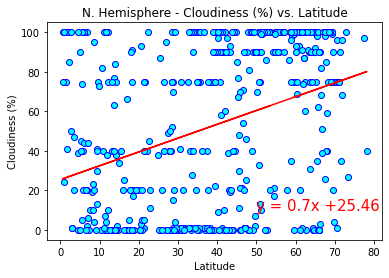

In [82]:
x_vals = n_hem["Lat"]
y_vals = n_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.")

plt.savefig("output_data/nhem_cloudiness_v_lat_plot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0055279143176624485
There is a little correlation between cloudiness and latitude for cities in the southern hemisphere.


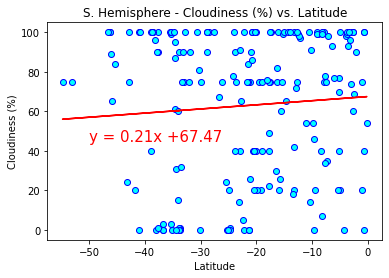

In [86]:
x_vals = s_hem["Lat"]
y_vals = s_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between cloudiness and latitude for cities in the southern hemisphere.")

plt.savefig("output_data/shem_cloudiness_v_lat_plot.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004980920683496572
There is a little correlation between wind speed and latitude for cities in the northern hemisphere.


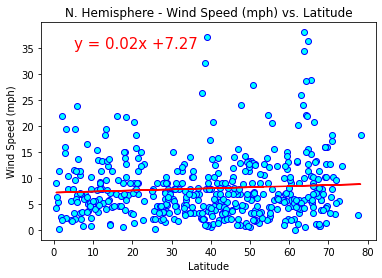

In [90]:
x_vals = n_hem["Lat"]
y_vals = n_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between wind speed and latitude for cities in the northern hemisphere.")

plt.savefig("output_data/nhem_wind_v_lat_plot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10481530336994127
There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.


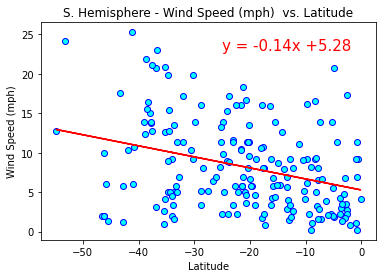

In [95]:
x_vals = s_hem["Lat"]
y_vals = s_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Wind Speed (mph)  vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,23),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.")

plt.savefig("output_data/shem_wind_v_lat_plot.png")